# VOWEL FORMANTS EXPLORATION

In [134]:
import math
import pandas as pd
import seaborn as sns
# import datascience as ds
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. Exploring TIMIT Data

We will start off by exploring and analyze real TIMIT data taken from 8 different regions of the TIMIT corpus. These measurements are taken at the midpoint of vowels, and vowel boundaries were determined automatically using forced alignment (Penn FA).

## 1.1 Uploading the data

Prior to being able to work with the data, we have to upload our dataset. As you run the cell, take a look at the code, but don't worry yourselves with the details. The first two lines of code below are what create the dataframe provided. The data is spread over several text files, so it takes a little bit more finesse to read than other datasets we have seen. The last line of code is what prints the `timit` dataframe, but instead of printing the whole dataframe, by using the method `.head`, it only prints the first 5 rows.

In [226]:
files = ['data/vowel_midpoints_dr' + str(ind) + '.txt' for ind in range(1,9)]
timit = pd.concat([pd.read_csv(file, sep='\t') for file in files]).reset_index(drop=True)

timit.head()

,speaker,gender,file,t,word,vowel,stress,duration,f1,f2,f3,f0
0,fcjf0,female,sa1,0.3225,SHE,IY,1,0.08,486.2,2467.9,3185.1,244.9
1,fcjf0,female,sa1,0.5025,HAD,AE,1,0.10,595.1,2067.0,2976.7,241.6
2,fcjf0,female,sa1,0.6825,YOUR,UH,1,0.04,468.7,1956.1,3061.4,201.9
3,fcjf0,female,sa1,0.8525,DARK,AA,1,0.10,740.4,1674.1,2767.3,221.5
4,fcjf0,female,sa1,1.1975,SUIT,UW,1,0.17,464.0,1698.0,2904.9,232.6


Look at the dataframe you created and try to conceptualize what each column measures. Each column represents a different attribute and that explained in the table below:

|Column Name|Details|
|---|---|
|speaker|unique speaker ID|
|gender|speaker’s self-reported gender|
|file|the filename — each sentence is recorded to a different file|
|t|time in the file measurements made (seconds)|
|word|lexical item (according to sentence prompt, not necessarily accurate)|
|vowel/stress|vowel ID in ARPABET (via CMU dictionary within Penn FA; not necessarily accurate)|
|duration|vowel duration given boundaries determined by Penn FA (seconds)|
|f0/f1/f2/f3|f0 and F1-F3 via ifcformant in BPM (Hz)|

## 1.2 Visualize Your Data

Now that we have organized all our data in a dataframe, let's draw some plots to visualize them better. By visualizing your data you are able to get more acquainted with possible trends or relationships. 

Run the cell below to see the distribution of `f1`.

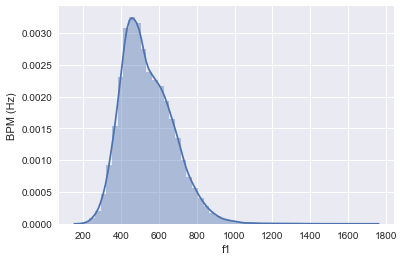

In [227]:
plot = sns.distplot(timit["f1"])
plot.set_ylabel("BPM (Hz)")

### <font color = "blue"> QUESTION #1 </font>

Can you estimate the mean of the distribution above? Write your answer in the cell below to by double clicking on it.

__Answer:__

Let's try visualizing the plots for `f1`, `f2`, `f3` along the same axis. Try running the cell below.

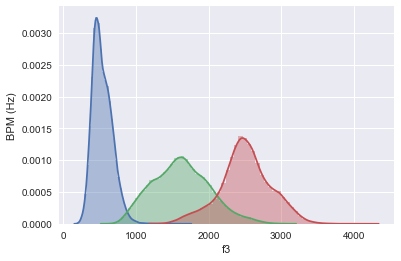

In [228]:
plot2 = sns.distplot(timit["f1"]) ##In Blue
plot2 = sns.distplot(timit["f2"]) ##In Green
plot2 = sns.distplot(timit["f3"]) ##In Red
plot2.set_ylabel("BPM (Hz)")

The blue color represents the distribution of f1, the green color represents the distribution of f2, and the red color represents the distribution of f3.

### <font color = "blue"> QUESTION #2 </font>

Write 2-3 sentences describing what you see in the visualization.

__Answer:__

Now we will be taking a look at differences based on gender. Try running the cell below.

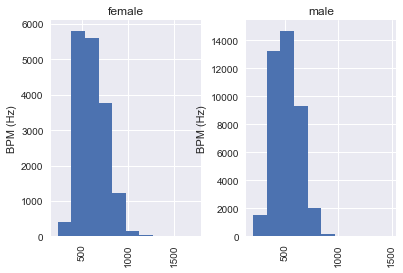

In [229]:
plots = timit['f1'].hist(by=timit['gender'])
for i in plots:
    i.set_ylabel("BPM (Hz)")

### <font color = "blue"> QUESTION #3 </font>

Does there seem to be a notable difference between male and female distributions of f1? Remember to pay close attention to the y-axis!

__Answer:__

Running the cells below we can compare the distribution of f0, f2, f2 based on gender using the same plot. Is there a noticebale difference between the two genders?

In [230]:
table = ds.Table.from_df(timit)
table.select(['f3', 'gender']).hist(group='gender', bins=range(1300, 4400, 100))

NameError: name 'ds' is not defined

In [231]:
table.select(['f0', 'gender']).hist(group='gender', bins=range(0, 550, 10))

NameError: name 'table' is not defined

In [232]:
table.select(['f2', 'gender']).hist(group='gender', bins=range(500, 3000, 80))

NameError: name 'table' is not defined

# 2. Clean Your Data

## 2.1 Drop Columns

Many times we are given datasets with more information than we need. Sometimes the datasets have empty values or columns that can actually make your data messier or harder to interpret. Before jumping into analyzing your data it is important to clean you data. In the cell below, we have dropped 3 columns that we do not need for the analysis.

In [233]:
#RUN THIS CELL
timit.drop(["speaker", "file", "word"], axis = 1, inplace = True)
timit.head()

,gender,t,vowel,stress,duration,f1,f2,f3,f0
0,female,0.3225,IY,1,0.08,486.2,2467.9,3185.1,244.9
1,female,0.5025,AE,1,0.10,595.1,2067.0,2976.7,241.6
2,female,0.6825,UH,1,0.04,468.7,1956.1,3061.4,201.9
3,female,0.8525,AA,1,0.10,740.4,1674.1,2767.3,221.5
4,female,1.1975,UW,1,0.17,464.0,1698.0,2904.9,232.6


### <font color = "blue"> EXERCISE #1 </font>

For this exercise you are going to drop two more columns we are not going to use for this specific exercise. For this analysis we are focusing on F1 and F2, which means we do not need <b>F0</b> and <b>F3</b>. For your first excercise drop the two columns we do not need in the cell below. If your columns were dropped successfully then you should no longer see them when you run the cell below.

<b>HINT:</b> Replace what is inbetween the square brackets with the names of the columns you want to drop.

In [234]:
#RUN THIS CELL

timit.drop(["NAME_OF_COLUMN1", "NAME_OF_COLUMN2"], axis = 1, inplace = True)
timit.head()

ValueError: labels ['NAME_OF_COLUMN1' 'NAME_OF_COLUMN2'] not contained in axis

## 2.2 Add Columns

### a. Transforming Variables

We need to convert our ARPABET symbols into the IPA conventions. The code below transforms the vowels to IPA and then adds a new column to the end of the dataframe.

In [235]:
timit['IPA'] = timit.vowel.map({"AO" : "ɔ", "AA" : "ɑ", "IY" : "i", "UW" : "u", "EH" : "ɛ", "IH" : "ɪ", "UH":"ʊ", "AH": "ʌ", "AX" : "ə", "AE":"æ", "EY" :"eɪ", "AY": "aɪ", "OW":"oʊ", "AW":"aʊ", "OY" :"ɔɪ", "ER":"ɝ"})
timit.head()

,gender,t,vowel,stress,duration,f1,f2,f3,f0,IPA
0,female,0.3225,IY,1,0.08,486.2,2467.9,3185.1,244.9,i
1,female,0.5025,AE,1,0.10,595.1,2067.0,2976.7,241.6,æ
2,female,0.6825,UH,1,0.04,468.7,1956.1,3061.4,201.9,ʊ
3,female,0.8525,AA,1,0.10,740.4,1674.1,2767.3,221.5,ɑ
4,female,1.1975,UW,1,0.17,464.0,1698.0,2904.9,232.6,u


## 2.3 Splitting/Subsetting the Data

There are many different ways to split your data to better analyze it in a more organized manner. Below we've provided several ways in which you can split your data -- such as gender and vowels. When it comes to analyzing your own data you can do this based on what you think would be the most effective.

### a. By Gender

Using the same dataframe we created above, `timit`, we are going to subset another dataframe. The first split will be by gender. To acknowledge all the types of genders listed under the gender column you can use the function provided below. If you run the cell below you could see that for this specific dataset there are only "female" and "male" unique values under gender. Given that information, you can create two subsets dataframes based off of gender. 

In [145]:
#RUN THIS CELL 
timit.gender.unique()

array(['female', 'male'], dtype=object)

The first subset dataframe you create will be called <b>fem_data</b> and that includes all the data for those that identify as "female". You will create another subset dataframe, but this one will be called <b>male_data</b>. This includes all the data for those who identify as "male". Creating these subset dataframes does not affect the original <i>timit</i> dataframe.

In [146]:
fem_data = timit[timit.gender == "female"]
fem_data.head()

,gender,t,vowel,stress,duration,f1,f2,f3,f0,IPA
0,female,0.3225,IY,1,0.08,486.2,2467.9,3185.1,244.9,i
1,female,0.5025,AE,1,0.10,595.1,2067.0,2976.7,241.6,æ
2,female,0.6825,UH,1,0.04,468.7,1956.1,3061.4,201.9,ʊ
3,female,0.8525,AA,1,0.10,740.4,1674.1,2767.3,221.5,ɑ
4,female,1.1975,UW,1,0.17,464.0,1698.0,2904.9,232.6,u


In [147]:
male_data = timit[timit.gender == "male"]
male_data.head()

,gender,t,vowel,stress,duration,f1,f2,f3,f0,IPA
1761,male,0.2775,IY,1,0.07,473.1,2134.7,2778.2,75.2,i
1762,male,0.4225,AE,1,0.08,453.0,1959.1,2613.8,158.8,æ
1763,male,0.5575,UH,1,0.03,356.3,1890.3,2723.1,164.4,ʊ
1764,male,0.7025,AA,1,0.10,684.3,1291.6,2288.3,70.9,ɑ
1765,male,1.1925,UW,1,0.18,418.7,1329.3,2439.9,140.7,u


### b. By Vowels

You could pick specific vowels to create a subset for using the <i>timit</i> dataframe. For the example provided below, we used the "aʊ" vowel, but you could subset on a vowel of your choice.

In [148]:
aw = timit[timit.IPA == "aʊ"]
aw.head()

,gender,t,vowel,stress,duration,f1,f2,f3,f0,IPA
81,female,0.2775,AW,1,0.07,710.2,1322.1,2672.0,248.5,aʊ
93,female,0.7775,AW,1,0.15,781.2,1340.9,2884.3,197.0,aʊ
229,female,0.8275,AW,1,0.17,772.8,1412.4,2467.0,209.8,aʊ
231,female,1.0675,AW,1,0.19,847.9,1530.6,2543.6,196.0,aʊ
304,female,2.1325,AW,1,0.16,726.8,1469.4,2456.5,185.0,aʊ


You could also subset the <b>fem_data</b> and <b>male_data</b> dataframes you created and subset again on specific vowels. For the examples provided below, we also used the "aʊ" IPA vowel to subset.

In [149]:
aw_fem = fem_data[fem_data.IPA == "aʊ"]
aw_fem.head()

,gender,t,vowel,stress,duration,f1,f2,f3,f0,IPA
81,female,0.2775,AW,1,0.07,710.2,1322.1,2672.0,248.5,aʊ
93,female,0.7775,AW,1,0.15,781.2,1340.9,2884.3,197.0,aʊ
229,female,0.8275,AW,1,0.17,772.8,1412.4,2467.0,209.8,aʊ
231,female,1.0675,AW,1,0.19,847.9,1530.6,2543.6,196.0,aʊ
304,female,2.1325,AW,1,0.16,726.8,1469.4,2456.5,185.0,aʊ


In [150]:
aw_male = male_data[male_data.IPA == "aʊ"]
aw_male.head()

,gender,t,vowel,stress,duration,f1,f2,f3,f0,IPA
1825,male,1.6925,AW,1,0.14,669.3,1223.7,2896.8,133.1,aʊ
1967,male,1.0575,AW,1,0.11,684.4,1270.4,2443.1,106.1,aʊ
1971,male,1.7425,AW,1,0.14,624.3,1158.4,2374.1,96.7,aʊ
2296,male,1.7075,AW,1,0.11,547.0,1103.4,2234.7,123.7,aʊ
2388,male,0.3925,AW,1,0.04,520.4,1016.2,2630.9,175.8,aʊ


### <font color = "blue"> EXERCISE #2 </font>

All of section 2.2 was based on subsetting dataframes. Using the examples provided above as resources, create a subset dataframe on the vowel of your choice. You can either use the <b>timit</b> dataframe to subset from or the <b>fem_data/male_data</b> to subset from. This vowel subset does not have to be used for your analysis, but it does serve as good practice. 

<b>HINT:</b> Replace everything that is capitalized according to your vowel and dataframe choice. The only capitalized section you don't need to change in the <b>".IPA"</b> portion.

In [151]:
#TRY THIS

YOUR_SUBSET = DATAFRAME_NAME[DATAFRAME_NAME.IPA == "IPA_VOWEL"]
YOUR_SUBSET.head()

NameError: name 'DATAFRAME_NAME' is not defined

# 3. More In-Depth Exploration of Data

## 3.1 Comparing  Vowel Means Based on Gender

To start off visualizing our data we have provided a bar chart showing the differences between average male f1 and average female f1 for each IPA character.

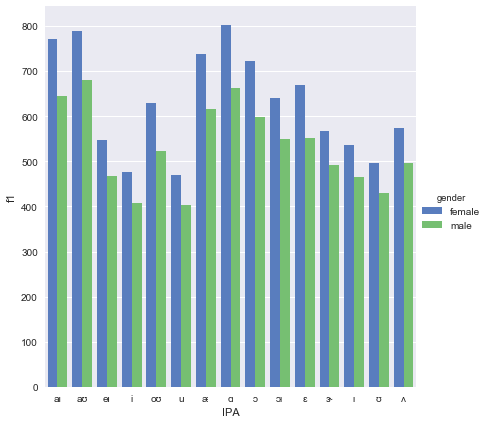

In [152]:
gendered_averages = timit.groupby(["gender", 'IPA']).mean().reset_index()

sns.factorplot(x="IPA", y="f1", hue="gender", data=gendered_averages,
                   size=6, kind="bar", palette="muted")

### <font color = "blue"> QUESTION #4 </font>

After analyzing the results from the bar chart, would you agree that the results coincide with what you had anticipated? Were the differences between women or men used more often something you had already predicted? Explain your thoughts with the results from the first visualization. Try changing parameters in the code cell to look at other vowel formants.

__Answer:__

## 3.2 Understanding Vowel Formants

" The frequency of the first formant <b>(F1)</b> is mostly determined by the height of the tongue body:<br>

<ul>high F1 = <i>low</i> vowel (i.e., high frequency F1 = low tongue body)<br>
low F1 = <i>high</i> vowel (i.e., low frequency F1 = high tongue body)</ul>


The frequency of the second formant <b>(F2)</b> is mostly determined by the frontness/backness of the tongue body:
<br><ul>
high F2 = <i>front</i> vowel<br>
low F2 = <i>back</i> vowel "</ul>

LINK : https://home.cc.umanitoba.ca/~krussll/phonetics/acoustic/formants.html

Below we grouped the data by each vowel and then found the mean of all its values. For the first cell below, we just printed it's results from F1 and put it in descending order. For the second cell we did very similar code, but instead focusing on F2.

Look at the brief definitions of F1 and F2 provided above this cell. Do you notice any trends in regards to the vowels that appeared most in specific genders and their characteristics of being high/low or front/back vowels? Are there any relationships?

In [153]:
F1 = timit.groupby("IPA").mean().f1.sort_values(ascending = False)
F1

IPA
aʊ    715.092608
ɑ     702.291314
aɪ    681.465885
æ     652.258700
ɔ     634.867838
ɛ     588.080265
ɔɪ    575.986430
oʊ    553.662717
ʌ     519.944476
ɝ     514.742700
eɪ    491.265252
ɪ     486.798266
ʊ     449.893593
i     427.340202
u     422.325870
Name: f1, dtype: float64

In [154]:
F2 = timit.groupby("IPA").mean().f2.sort_values(ascending = False)
F2

IPA
i     2043.482354
eɪ    2032.372756
ɪ     1843.402023
æ     1761.430284
ɛ     1669.534859
aɪ    1617.320331
ʊ     1589.082730
u     1556.944049
ʌ     1522.298740
ɝ     1432.745745
aʊ    1347.778226
ɑ     1273.200030
ɔɪ    1261.274572
oʊ    1155.284637
ɔ     1095.295097
Name: f2, dtype: float64

### a. F2 and F1 (by Gender)

Lets take a look at our F1 vs F2 relationship color coded by gender. The yellow points symbolize females and the blue points symbolize males. Do u see a notable difference?

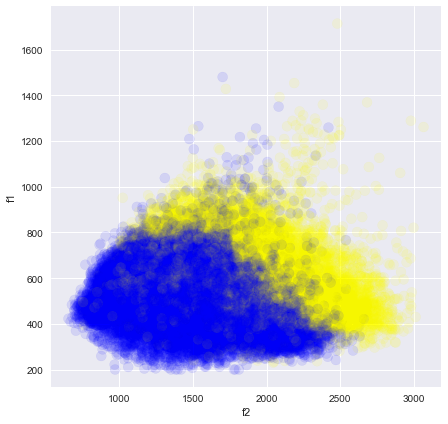

In [155]:
timit.plot(kind = 'scatter', x = 'f2', y = 'f1', c = timit.gender.map({"female": 'yellow', "male": 'blue'}), s = 100, figsize = (7, 7), alpha=0.1);

As you can see with the cell above, there is some distinction with F2 and F1 based off of gender. The higher the F2, the higher the probability of it being a female. A higher F2 means that it is a front vowel.


Due to the fact that there are so many data points, this scatter plot is not the best visual representation to use. Below are density maps which show the same type of information as the plot above, but instead of resembling blobs, the more dense the area the darker the shade.

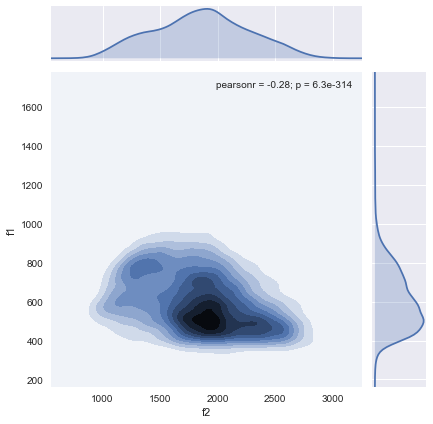

In [160]:
sns.jointplot("f2", "f1", data=fem_data, kind='kde')

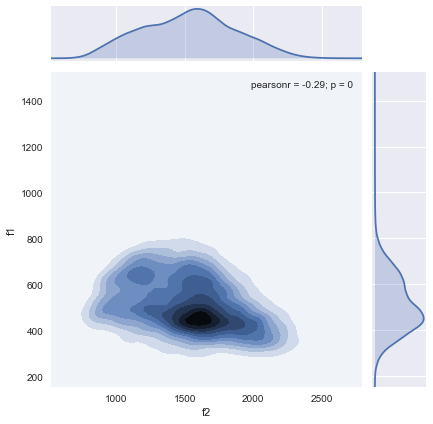

In [157]:
sns.jointplot("f2", "f1", data=male_data, kind='kde')

## 3.3 Is there a linear relationship?

Below, we have plotted the vowels in accordance to the mean of their F2/F1. The simplest statistical test we can perform on our data is the linear regression test. From the cell provided below do you think the vowels could be categorized as having a linear relationship?

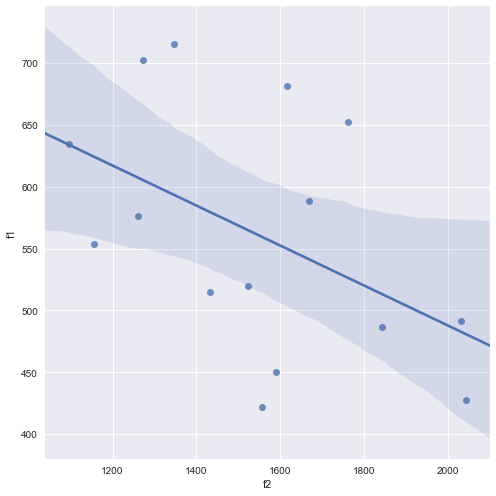

In [158]:
vow_mean = timit.groupby("vowel").mean()
sns.lmplot(x = 'f2', y = 'f1', data = vow_mean, size = 7, )

### <font color = "blue"> QUESTION #5 </font>

<img src ="https://www.happyhourspanish.com/wp-content/uploads/2016/08/IPA-chart-vowels-768x576.png" width="50%" height="50%" >

If the linear relationship was not the best fit, what regression model do you think fits the vowel space the most? Above this cell there is a IPA vowel chart to serve as a visual representation of where the vowels are placed in comparison to your model?

__Answer:__

# 4. Vowel Spaces

We start of by grouping all the rows by their vowel and calculating the mean for each column attribute for each vowel.

In [133]:
avgs = timit.groupby('IPA').mean()
avgs.head()

KeyError: 'IPA'

## 4.1 Constructing a Vowel Space

Let's construct a vowel space! Run the cell below to view the vowel space of f1 vs f2.

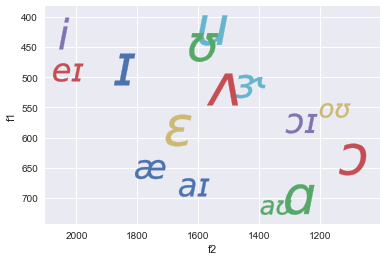

In [162]:
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(avgs)):
    plt.scatter(avgs.f2[i], avgs.f1[i], marker=r"$ {} $".format(avgs.index[i]), s=1000)
    
plt.ylabel('f1')
plt.xlabel('f2');

## 4.3 Using Logarithmic Axes

In the visualization above we use linear axes in order to construct our vowel space. Lets observe how the vowel space would change using logarithmic axes. The cell below will take the log of all values in our f1 and f2 columns and add them as new columns of our TIMIT table.

In [163]:
logf1 = []
logf2 = []
for i in timit["f1"]:
    logf1 += [math.log(i)]
for j in timit["f2"]:
    logf2 += [math.log(j)]
timit["logf1"] = logf1
timit["logf2"] = logf2
newavgs = timit.groupby('IPA').mean()
newavgs.head()

,t,stress,duration,f1,f2,f3,f0,logf1,logf2
IPA,,,,,,,,,
aɪ,1.635594,1.054163,0.134256,681.465885,1617.320331,2499.876960,135.767785,6.510240,7.378111
aʊ,1.448535,1.048387,0.156129,715.092608,1347.778226,2545.013978,144.840457,6.564378,7.195039
eɪ,1.555879,1.144261,0.113957,491.265252,2032.372756,2625.841760,140.674900,6.185279,7.608959
i,1.464642,0.495423,0.092407,427.340202,2043.482354,2617.781014,146.176357,6.036894,7.608724
oʊ,1.234788,1.009368,0.116923,553.662717,1155.284637,2557.553349,148.857471,6.303124,7.031348


Let's plot the new vowel space using these new columns


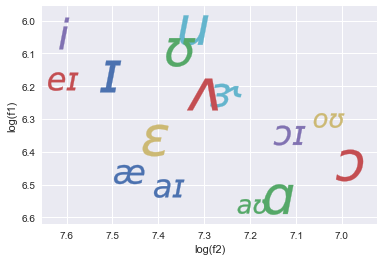

In [164]:
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(avgs)):
    plt.scatter(newavgs.logf2[i], newavgs.logf1[i], marker=r"$ {} $".format(newavgs.index[i]), s=1000)
    
plt.ylabel('log(f1)')
plt.xlabel('log(f2)')

### <font color = "blue"> QUESTION #6 </font>

How would you describe the vowel space above?

__Answer:__

## 4.4 Further Visualizations

Run the cells below to see more visualizations of the vowel space created from our TIMIT data


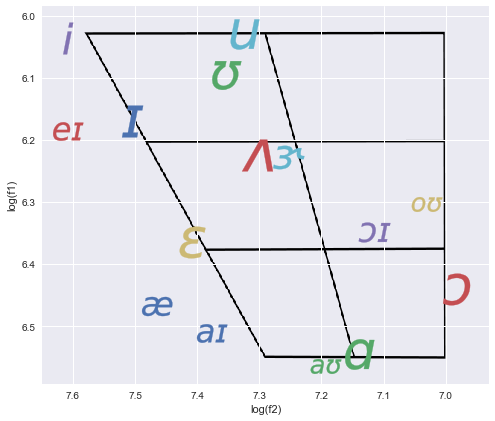

In [165]:
plt.figure(figsize=(8, 10))

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(newavgs)):
    plt.scatter(newavgs.logf2[i], newavgs.logf1[i], marker=r"$ {} $".format(newavgs.index[i]), s=1000)
    
plt.ylabel('log(f1)')
plt.xlabel('log(f2)')

im = plt.imread('images/blankvowel.png')
ax = plt.imshow(im, extent=(plt.xlim()[0], plt.xlim()[1], plt.ylim()[0], plt.ylim()[1]))

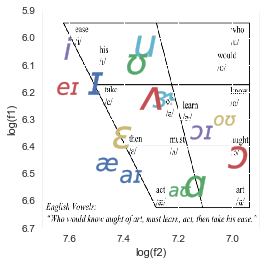

In [166]:
plt.figure(figsize=(10,4))

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(avgs)):
    plt.scatter(newavgs.logf2[i], newavgs.logf1[i], marker=r"$ {} $".format(newavgs.index[i]), s=500)
    
plt.ylabel('log(f1)')
plt.xlabel('log(f2)')

im = plt.imread('images/notblank.png')
ax = plt.imshow(im, extent=(7.7, 6.9, 6.7, 5.9))

# 5. Corner Vowels

Our next step is to plot the relationship between corner vowels. Lets compare the F1 vs F2 corner vowels. Run the cell below to select the corner vowels.

In [167]:
IPAtable = ds.Table.from_df(timit)

pick_vowel = lambda vowel: table.where(IPAtable['IPA'] == vowel)

i = pick_vowel('i')
ar = pick_vowel('aɪ')
a = pick_vowel('ɑ')
u = pick_vowel('u')

corners = [i,ar,a,u]

NameError: name 'ds' is not defined

Now that we have collected all the corner vowels, lets start comparing them! Run the cell below to plot the "a" (in blue)and "i" (in red) corner vowels from f1 and f2. Take note of the differences in distribution.

In [168]:
plt.scatter(a['f1'], a['f2'], alpha=.05)
plt.ylabel("BPM (Hz)")
plt.xlabel("BPM (Hz)")
plt.scatter(i['f1'], i['f2'], alpha=.05, color='r')

NameError: name 'a' is not defined

In [169]:
ax = sns.kdeplot(a['f1'], a['f2'], cmap="Reds", shade=True, shade_lowest=False)
plt.ylabel("BPM (Hz)")
plt.xlabel("BPM (Hz)")
ax = sns.kdeplot(i['f1'], i['f2'], cmap="Blues", shade=True, shade_lowest=False)

NameError: name 'a' is not defined

Every colored dot in the first graph represents a data point, and the second graph highlights the relative density of each dataset at certain areas.

### <font color = "blue"> QUESTION #7 </font>

Describe and compare the distribution of the two vowels. What seems to be the average value of each vowel? Whats the min and max?

__Answer:__

Lets try to create similar visualizations for the "ar" and "u" vowels in F1 and F2.

In [170]:
plt.scatter(ar['f1'], ar['f2'], alpha=.05)
plt.ylabel("BPM (Hz)")
plt.xlabel("BPM (Hz)")
plt.scatter(u['f1'], u['f2'], alpha=.05, color='r')

NameError: name 'ar' is not defined

In [171]:
ax = sns.kdeplot(ar['f1'], ar['f2'], cmap="Reds", shade=True, shade_lowest=False)
plt.ylabel("BPM (Hz)")
plt.xlabel("BPM (Hz)")
ax = sns.kdeplot(u['f1'], u['f2'], cmap="Blues", shade=True, shade_lowest=False)

NameError: name 'ar' is not defined

### <font color = "blue"> QUESTION #8 </font>

Describe and compare the distribution of the two vowels. What seems to be the average value of each vowel? Whats the min and max?

__Answer:__

Bringing it all together, we can see the distributions of various corner vowels in the following plot. Run the cell below!


NameError: name 'ar' is not defined

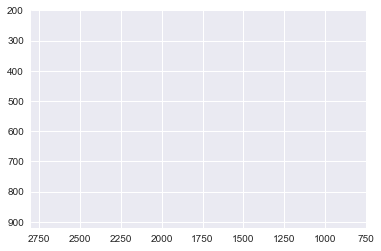

In [172]:
plt.ylim(920, 200)
plt.xlim(2800, 750)

ax = sns.kdeplot(ar['f2'], ar['f1'], cmap="Reds")
ax = sns.kdeplot(i['f2'], i['f1'], cmap="Blues")
ax = sns.kdeplot(a['f2'], a['f1'], cmap="Greens")
ax = sns.kdeplot(u['f2'], u['f1'], cmap="Greys")

plt.ylabel('f1')
plt.xlabel('f2')

# <font color = red> 6. Drawing Our Own Vowel Space!

##### NOTE: WE'RE ASSUMING THAT THE FILE UPLOADED BY THE 2017 CLASS WILL FOLLOW THE IPA FORMAT BUT FOR THE SAKE OF A PLACEHOLDER WE WILL USE A FILE FROM THE TIMIT DATA AND CONVERT IT TO IPA FORMAT. THOSE CELLS CAN BE DELETED LATER ON

(DELETE THIS CELL LATER ON)

## 6.1 Loading the Data

Now that we have analyzed the TIMIT data, its time for us to make our own vowel space! First load our data file by replacing the ellipses, with the file name.

In [173]:
Fall2017_file = 'data/vowel_midpoints_dr1.txt' #CHANGE TO elipses
Fa17 = pd.read_csv(Fall2017_file, sep= "\t").reset_index(drop=True)
Fa17.head(10)

,speaker,gender,file,t,word,vowel,stress,duration,f1,f2,f3,f0
0,fcjf0,female,sa1,0.3225,SHE,IY,1,0.08,486.2,2467.9,3185.1,244.9
1,fcjf0,female,sa1,0.5025,HAD,AE,1,0.10,595.1,2067.0,2976.7,241.6
2,fcjf0,female,sa1,0.6825,YOUR,UH,1,0.04,468.7,1956.1,3061.4,201.9
3,fcjf0,female,sa1,0.8525,DARK,AA,1,0.10,740.4,1674.1,2767.3,221.5
4,fcjf0,female,sa1,1.1975,SUIT,UW,1,0.17,464.0,1698.0,2904.9,232.6
5,fcjf0,female,sa1,1.3275,IN,AH,0,0.03,501.4,1929.1,2874.8,269.0
6,fcjf0,female,sa1,1.5525,GREASY,IY,1,0.04,431.5,2186.3,2858.7,207.8
7,fcjf0,female,sa1,1.7325,GREASY,IY,0,0.06,431.1,1368.3,2896.4,223.5
8,fcjf0,female,sa1,1.9175,WASH,AA,1,0.11,687.4,1309.6,2681.4,191.7
9,fcjf0,female,sa1,2.1775,WATER,AO,1,0.09,568.0,1105.9,2852.3,182.3


In [174]:
##Delte this cell later
vows = Fa17["vowel"]
IPAdict = {"AO" : "ɔ", "AA" : "ɑ", "IY" : "i", "UW" : "u", "EH" : "ɛ", "IH" : "ɪ", "UH":"ʊ", "AH": "ʌ", "AX" : "ə", "AE":"æ", "EY" :"eɪ", "AY": "aɪ", "OW":"oʊ", "AW":"aʊ", "OY" :"ɔɪ", "ER":"ɝ"}
newVows = []
for i in vows:
    newVows += [IPAdict[i]]
Fa17['IPA'] = newVows

As before, we group all the rows by their vowel and calculate the mean for each column attribute for each vowel.


In [175]:
Fa17avgs = Fa17.groupby('IPA').mean()
Fa17avgs.head()

logf1 = []
logf2 = []
for i in Fa17avgs["f1"]:
    logf1 += [math.log(i)]
for j in Fa17avgs["f2"]:
    logf2 += [math.log(j)]
Fa17avgs["logf1"] = logf1
Fa17avgs["logf2"] = logf2
newavgs = timit.groupby('IPA').mean()
newavgs.head()

,t,stress,duration,f1,f2,f3,f0,logf1,logf2
IPA,,,,,,,,,
aɪ,1.635594,1.054163,0.134256,681.465885,1617.320331,2499.876960,135.767785,6.510240,7.378111
aʊ,1.448535,1.048387,0.156129,715.092608,1347.778226,2545.013978,144.840457,6.564378,7.195039
eɪ,1.555879,1.144261,0.113957,491.265252,2032.372756,2625.841760,140.674900,6.185279,7.608959
i,1.464642,0.495423,0.092407,427.340202,2043.482354,2617.781014,146.176357,6.036894,7.608724
oʊ,1.234788,1.009368,0.116923,553.662717,1155.284637,2557.553349,148.857471,6.303124,7.031348


## 6.2 Creating Our Vowel Space

As we saw before, the visualization of our vowel space looked more accurate using logarithmic axes. Run the cell below to plot our vowel space with logarithmic axes.

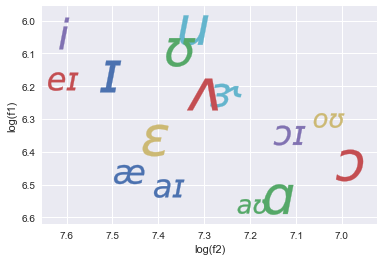

In [176]:
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(avgs)):
    plt.scatter(newavgs.logf2[i], newavgs.logf1[i], marker=r"$ {} $".format(newavgs.index[i]), s=1000)
    
plt.ylabel('log(f1)')
plt.xlabel('log(f2)')

### <font color = "blue"> QUESTION #9 </font>

Describe the resulting vowel space. How does it compare with the vowel space from the TIMIT data?

__Answer:__

### <font color = "blue"> QUESTION #10 </font>

What may be the cause for any differences between our vowel space and the one constructed using the TIMIT data? Do you notice any outliers or some points that seem off?

__Answer:__

# 7. Making Your Own Predictions

You have created your own vowel space and explored the dataset in the examples above. Now, it is time to make your own predictions based off of the information learned.

## 7.1 Predict the Vowel based off Gender + Height

The function below is intended to output the closest vowel based off of the gender and vowel heights you input into the parenthesis.

In [307]:
def vowel_predictor(str_gender, f2, f1):
    if str_gender == "female":
        fem_DF = timit[timit["gender"]=="female"]
        closest_f2 = min(timit["f2"], key=lambda x:abs(x-f2))
        fem_row = fem_DF[fem_DF["f2"] == closest_f2]
        closest_f1 = min(fem_row["f1"], key=lambda x:abs(x-f1))
        pred = fem_row[fem_row["f1"] == closest_f1]
        return pred.IPA
    if str_gender == "male":
        male_DF = timit[timit["gender"]=="male"]
        closest_f2 = min(timit["f2"], key=lambda x:abs(x-f2))
        male_row = male_DF[male_DF["f2"] == closest_f2]
        closest_f1 = min(male_row["f1"], key=lambda x:abs(x-f1))
        pred = male_row[male_row["f1"] == closest_f1]
        return pred.IPA      

## Try the function with your own data, here!

HINT: Don't forget to input the gender as a string

In [309]:
vowel_predictor(str_gender, f2, f1)

NameError: name 'str_gender' is not defined